In [2]:

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional
import seaborn as sns

In [3]:
sns.set_style('darkgrid')
plt.figure()


def get_data_frame(path: Optional[str] = 'sum_radar-qpe.xlsx'):
    df = pd.read_excel('../assets/results/' + path)
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.replace('-', 0, regex=True)
    df['sum'] = df['sum'].replace(np.nan, 0)
    df = df.replace(np.nan, '')
    return df


<Figure size 640x480 with 0 Axes>

In [4]:
# clean data

df_radar = get_data_frame()
date = pd.to_datetime(df_radar[['year', 'month', 'day']])
date = date.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_radar['date'] = date
df_radar['english_day'] = df_radar.date.dt.strftime('%a')
df_radar = df_radar.sort_values(by='date')
df_radar = df_radar.reset_index()
df_radar['sum'] = df_radar['sum'].astype(float)
df_radar = df_radar.drop(['index'], axis=1)
df_radar = df_radar.drop(['Unnamed: 0.1'], axis=1)
df_radar.head()


,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,21Z,22Z,23Z,sum,year,month,day,SUM,date,english_day
0,75,456,Don Muang Airport,Central,13.919167,100.605000,0,,0,0,...,0,0,0,0.0,2020,5,27,0.65,2020-05-27 07:00:00+07:00,Wed
1,86,463,Laem Chabang,Eastern,13.076944,100.875833,0,,0,0,...,0,0,0,0.0,2020,5,27,0.55,2020-05-27 07:00:00+07:00,Wed
2,85,459,Chon Buri,Eastern,13.366667,100.983334,0,,0,0,...,0,0,0,0.0,2020,5,27,1.45,2020-05-27 07:00:00+07:00,Wed
3,84,458,Chachoengsao (1),Eastern,13.515556,101.458333,0,,0,0,...,0,0,0,0.0,2020,5,27,12.6,2020-05-27 07:00:00+07:00,Wed
4,83,462,Aranyaprathet,Eastern,13.700000,102.583334,0,,0,0,...,0,0,0,0.0,2020,5,27,0.7,2020-05-27 07:00:00+07:00,Wed


In [5]:
# clean data

df_gsmap = get_data_frame(path='sum_gsmap-nrt.xlsx')
date = pd.to_datetime(df_gsmap[['year', 'month', 'day']])
date = date.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_gsmap['date'] = date
df_gsmap['english_day'] = df_gsmap.date.dt.strftime('%a')
df_gsmap = df_gsmap.sort_values(by='date')
df_gsmap = df_gsmap.reset_index()
df_gsmap['sum'] = df_gsmap['sum'].astype(float)
df_gsmap = df_gsmap.drop(['index'], axis=1)
df_gsmap = df_gsmap.drop(['Unnamed: 0.1'], axis=1)
df_gsmap.head()


,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
0,92,480,Chanthaburi,Eastern,12.616667,102.113333,0,0,0,0,...,0,0,0,0,0.000000,2020,6,10,2020-06-10 07:00:00+07:00,Wed
1,91,479,Huai Pong (1),Eastern,12.733334,101.133334,0,0,0,0,...,0,0,0,0.6649408936500549,2.034856,2020,6,10,2020-06-10 07:00:00+07:00,Wed
2,90,478,Rayong,Eastern,12.617028,101.340750,0,0,0,0.5276537537574768,...,0,0,0,0.6780630350112915,5.602493,2020,6,10,2020-06-10 07:00:00+07:00,Wed
3,89,477,Sattahip,Eastern,12.683334,100.983334,0,0,0,0,...,0,0,0,0,0.000000,2020,6,10,2020-06-10 07:00:00+07:00,Wed
4,88,461,Pattaya,Eastern,12.920000,100.869444,0,0,0,0,...,0,0,0,0,0.000000,2020,6,10,2020-06-10 07:00:00+07:00,Wed


In [6]:
#clean data

df_persiann = get_data_frame(path='sum_persiann-css.xlsx')
date = pd.to_datetime(df_persiann[['year', 'month', 'day']])
date = date.dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_persiann['date'] = date
df_persiann['english_day'] = df_persiann.date.dt.strftime('%a')
df_persiann = df_persiann.sort_values(by='date')
df_persiann = df_persiann.reset_index()
df_persiann['sum'] = df_persiann['sum'].astype(float)
df_persiann = df_persiann.drop(['index'], axis=1)
df_persiann = df_persiann.drop(['Unnamed: 0.1'], axis=1)
df_persiann.head()

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
0,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0,0,0,...,0,0,0,0,0.00,2020,6,10,2020-06-10 07:00:00+07:00,Wed
1,34,354,Udon Thani,Northeastern,17.383333,102.800000,0,0,0,0,...,0,0,0,0,0.00,2020,6,10,2020-06-10 07:00:00+07:00,Wed
2,36,358,Nakhon Phanom (1),Northeastern,17.443056,104.773611,0,0,0,0,...,0,0,0,0,0.00,2020,6,10,2020-06-10 07:00:00+07:00,Wed
3,37,356,Sakon Nakhon,Northeastern,17.150003,104.133336,0.47999998927116394,0,0,0,...,0,0,0,0,0.48,2020,6,10,2020-06-10 07:00:00+07:00,Wed
4,38,355,Sakon Nakhon (1),Northeastern,17.125028,104.061000,0.6200000047683716,0,0,0,...,0,0,0,0,0.62,2020,6,10,2020-06-10 07:00:00+07:00,Wed


In [7]:
starting_date_radar = df_radar[:1]['date']
ending_date_radar = df_radar[-1:]['date']
print(starting_date_radar)
print(ending_date_radar)


0   2020-05-27 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]
43027   2021-09-26 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]


In [8]:
starting_date_radar = df_gsmap[:1]['date']
ending_date_radar = df_gsmap[-1:]['date']
print(starting_date_radar)
print(ending_date_radar)

0   2020-06-10 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]
43049   2021-12-31 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]


In [9]:
starting_date_radar = df_persiann[:1]['date']
ending_date_radar = df_persiann[-1:]['date']
print(starting_date_radar)
print(ending_date_radar)

0   2020-06-10 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]
43049   2021-12-31 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]


In [10]:
display(df_radar.isnull().any())
display(df_gsmap.isnull().any())
display(df_persiann.isnull().any())

ID             False
WMO_CODE       False
NAME_EN        False
Region         False
Latitude       False
Longitude      False
00Z            False
01Z            False
02Z            False
03Z            False
04Z            False
05Z            False
06Z            False
07Z            False
08Z            False
09Z            False
10Z            False
11Z            False
12Z            False
13Z            False
14Z            False
15Z            False
16Z            False
17Z            False
18Z            False
19Z            False
20Z            False
21Z            False
22Z            False
23Z            False
sum            False
year           False
month          False
day            False
SUM            False
date           False
english_day    False
dtype: bool

ID             False
WMO_CODE       False
NAME_EN        False
Region         False
Latitude       False
Longitude      False
00Z            False
01Z            False
02Z            False
03Z            False
04Z            False
05Z            False
06Z            False
07Z            False
08Z            False
09Z            False
10Z            False
11Z            False
12Z            False
13Z            False
14Z            False
15Z            False
16Z            False
17Z            False
18Z            False
19Z            False
20Z            False
21Z            False
22Z            False
23Z            False
sum            False
year           False
month          False
day            False
date           False
english_day    False
dtype: bool

ID             False
WMO_CODE       False
NAME_EN        False
Region         False
Latitude       False
Longitude      False
00Z            False
01Z            False
02Z            False
03Z            False
04Z            False
05Z            False
06Z            False
07Z            False
08Z            False
09Z            False
10Z            False
11Z            False
12Z            False
13Z            False
14Z            False
15Z            False
16Z            False
17Z            False
18Z            False
19Z            False
20Z            False
21Z            False
22Z            False
23Z            False
sum            False
year           False
month          False
day            False
date           False
english_day    False
dtype: bool

In [11]:
display(df_radar.info())
display(df_gsmap.info())
display(df_persiann.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43028 entries, 0 to 43027
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype                       
---  ------       --------------  -----                       
 0   ID           43028 non-null  int64                       
 1   WMO_CODE     43028 non-null  int64                       
 2   NAME_EN      43028 non-null  object                      
 3   Region       43028 non-null  object                      
 4   Latitude     43028 non-null  float64                     
 5   Longitude    43028 non-null  float64                     
 6   00Z          43028 non-null  object                      
 7   01Z          43028 non-null  object                      
 8   02Z          43028 non-null  object                      
 9   03Z          43028 non-null  object                      
 10  04Z          43028 non-null  object                      
 11  05Z          43028 non-null  object                      
 12  06Z 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43050 entries, 0 to 43049
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype                       
---  ------       --------------  -----                       
 0   ID           43050 non-null  int64                       
 1   WMO_CODE     43050 non-null  int64                       
 2   NAME_EN      43050 non-null  object                      
 3   Region       43050 non-null  object                      
 4   Latitude     43050 non-null  float64                     
 5   Longitude    43050 non-null  float64                     
 6   00Z          43050 non-null  object                      
 7   01Z          43050 non-null  object                      
 8   02Z          43050 non-null  object                      
 9   03Z          43050 non-null  object                      
 10  04Z          43050 non-null  object                      
 11  05Z          43050 non-null  object                      
 12  06Z 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43050 entries, 0 to 43049
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype                       
---  ------       --------------  -----                       
 0   ID           43050 non-null  int64                       
 1   WMO_CODE     43050 non-null  int64                       
 2   NAME_EN      43050 non-null  object                      
 3   Region       43050 non-null  object                      
 4   Latitude     43050 non-null  float64                     
 5   Longitude    43050 non-null  float64                     
 6   00Z          43050 non-null  object                      
 7   01Z          43050 non-null  object                      
 8   02Z          43050 non-null  object                      
 9   03Z          43050 non-null  object                      
 10  04Z          43050 non-null  object                      
 11  05Z          43050 non-null  object                      
 12  06Z 

None

In [12]:
def plot_summary_statistic(df, header: Optional[str] = 'radar'):
    fig = plt.figure(figsize=(4, 3))
    station = len(set(df['NAME_EN']))
    labels = ['station', 'max', 'mean', 'std']
    mat = station, df['sum'].max(), df['sum'].mean(), df['sum'].std()

    plt.bar(labels, mat, width=0.7, color=('maroon', 'g', 'orange', 'red'))
    plt.xlabel('Summary statistic')
    plt.ylabel('Rainfall (mm)')
    plt.title(f'{header} statistic 2020 & 2021')
    plt.show()


In [13]:
def get_summary(df, title):
    station = len(set(df['NAME_EN']))
    sum_max = df['sum'].max()
    sum_mean = df['sum'].mean()
    std = df['sum'].std()
    return station, sum_max, sum_mean, title, std


def iter_summary(summary: tuple, lst: list):
    station, _max, _mean, title, std = summary
    obj = dict()
    obj['max'] = _max
    obj['mean'] = _mean
    obj['title'] = title
    obj['std'] = std
    obj['station'] = station
    lst.append(obj)
    return lst


In [14]:
sum_radar = get_summary(df_radar, 'radar')
sum_gsmap = get_summary(df_gsmap, 'gsmap')
sum_persiann = get_summary(df_persiann, 'persiann')

In [15]:
lst = []
iter_summary(sum_radar, lst)
iter_summary(sum_gsmap, lst)
iter_summary(sum_persiann, lst)
lst

[{'max': 550.1998291015625,
  'mean': 3.3262668139463747,
  'title': 'radar',
  'std': 11.816802671610777,
  'station': 123},
 {'max': 722.7818603515625,
  'mean': 5.667678388400192,
  'title': 'gsmap',
  'std': 16.63839205808796,
  'station': 123},
 {'max': 182.2899932861328,
  'mean': 4.975703616700465,
  'title': 'persiann',
  'std': 15.91442844357301,
  'station': 123}]

In [16]:
df_summary = pd.DataFrame(lst)
df_summary = df_summary.set_index('title')
df_summary

,max,mean,std,station
title,,,,
radar,550.199829,3.326267,11.816803,123
gsmap,722.781860,5.667678,16.638392,123
persiann,182.289993,4.975704,15.914428,123


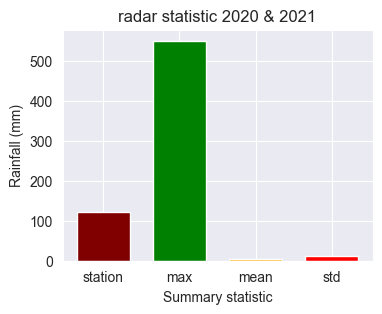

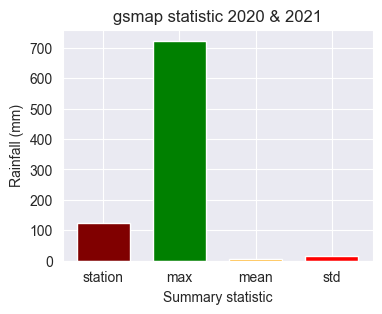

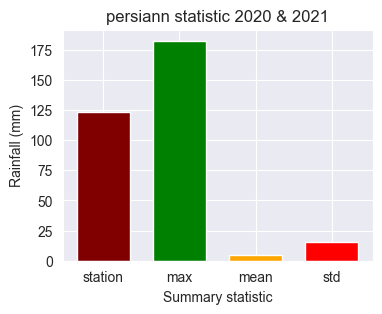

In [17]:
plot_summary_statistic(df_radar)
plot_summary_statistic(df_gsmap, 'gsmap')
plot_summary_statistic(df_persiann, 'persiann')


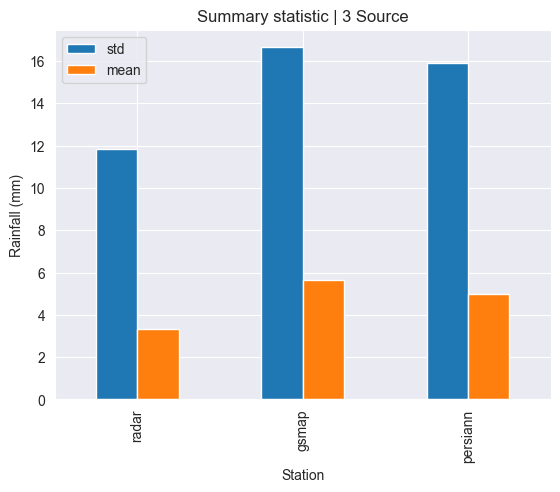

In [18]:
df_summary[['std', 'mean']].plot.bar()
plt.xlabel('Station')
plt.ylabel('Rainfall (mm)')
plt.title('Summary statistic | 3 Source')
plt.show()

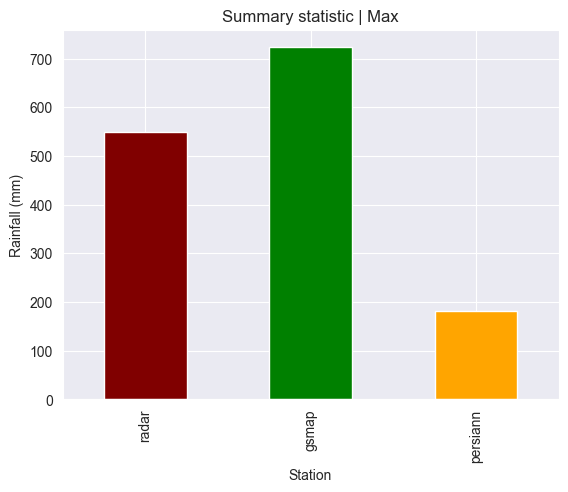

In [19]:
df_summary['max'].plot.bar(color=['maroon', 'g', 'orange'])
plt.xlabel('Station')
plt.ylabel('Rainfall (mm)')
plt.title('Summary statistic | Max')
plt.show()

In [20]:
# start_date = '2020-05-10'
# end_date = '2020-10-10'

def filter_dates(
        df,
        start_date: Optional[str] = None,
        end_date: Optional[str] = None,
        year: Optional[int] = 2020
):
    if start_date and end_date:
        after_start_date = df['date'] >= start_date
        before_end_date = df['date'] <= end_date
        between_two_dates = after_start_date & before_end_date
        filtered_dates = df.loc[between_two_dates]
        return filtered_dates
    return df.loc[df['year'] == year]


In [21]:
def summary_year(df):
    year_2020 = filter_dates(df)
    year_2020 = year_2020.groupby(year_2020.date.dt.month)['sum']
    year_2021 = filter_dates(df, start_date='2021-01-01', end_date='2021-12-31')
    year_2021 = year_2021.groupby(year_2021.date.dt.month)['sum']
    return year_2020, year_2021

In [22]:
def index_of_missing(df, rename):
    df = df.reset_index()
    df = df.set_index('date')
    df = df.rename(columns={'sum': rename})
    cols = np.arange(1, 13.0)
    df = (df.reindex(cols, fill_value=0))
    return df

In [23]:
radar_2020, radar_2021 = summary_year(df_radar)

display(radar_2020.sum())
display(radar_2021.sum())

date
5         0.000000
6      9600.759997
7     19736.429656
8      9794.389868
9     19718.429813
10    18400.929777
11     7750.869948
12     3613.089916
Name: sum, dtype: float64

date
1      342.269996
2        0.100000
4     7588.359923
5    11570.569887
6     9410.629935
7     7744.239906
8     7998.099929
9     9853.439917
Name: sum, dtype: float64

In [24]:
gsmap_2020, gsmap_2021 = summary_year(df_gsmap)

display(gsmap_2020.sum())
display(gsmap_2021.sum())

date
6     15296.397536
7     20847.925590
8     29745.399860
9     28921.898964
10    22906.838434
11     9443.744352
12    14649.167082
Name: sum, dtype: float64

date
7      1878.156284
8     16649.991060
9     33028.153256
10    21506.407227
11    24723.467009
12     4393.223223
Name: sum, dtype: float64

In [25]:
persiann_2020, persiann_2021 = summary_year(df_persiann)

display(persiann_2020.sum())
display(persiann_2021.sum())

date
6     17665.469970
7     25551.489980
8     29220.850079
9     32842.929985
10    23565.280054
11     7262.960036
12     7296.130016
Name: sum, dtype: float64

date
7      2254.889999
8     -5590.719535
9     34986.619996
10    18479.170043
11    18268.730054
12     2320.500021
Name: sum, dtype: float64

In [26]:
df_summary_period = index_of_missing(radar_2020.sum(), 'sum_radar_2020')
sum_radar_2021 = index_of_missing(radar_2021.sum(), 'sum_radar_2021')
mean_radar_2020 = index_of_missing(radar_2020.mean(), 'mean_radar_2020')
mean_radar_2021 = index_of_missing(radar_2021.mean(), 'mean_radar_2021')

sum_gsmap_2020 = index_of_missing(gsmap_2020.sum(), 'sum_gsmap_2020')
sum_gsmap_2021 = index_of_missing(gsmap_2021.sum(), 'sum_gsmap_2021')
mean_gsmap_2020 = index_of_missing(gsmap_2020.mean(), 'mean_gsmap_2020')
mean_gsmap_2021 = index_of_missing(gsmap_2021.mean(), 'mean_gsmap_2021')

sum_persiann_2020 = index_of_missing(persiann_2020.sum(), 'sum_persiann_2020')
sum_persiann_2021 = index_of_missing(persiann_2021.sum(), 'sum_persiann_2021')
mean_persiann_2020 = index_of_missing(persiann_2020.mean(), 'mean_persiann_2020')
mean_persiann_2021 = index_of_missing(persiann_2021.mean(), 'mean_persiann_2021')


In [27]:
df_summary_period = df_summary_period.merge(sum_radar_2021['sum_radar_2021'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(mean_radar_2020['mean_radar_2020'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(mean_radar_2021['mean_radar_2021'], left_index=True, right_index=True)

df_summary_period = df_summary_period.merge(sum_gsmap_2020['sum_gsmap_2020'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(sum_gsmap_2021['sum_gsmap_2021'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(mean_gsmap_2020['mean_gsmap_2020'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(mean_gsmap_2021['mean_gsmap_2021'], left_index=True, right_index=True)

df_summary_period = df_summary_period.merge(sum_persiann_2020['sum_persiann_2020'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(sum_persiann_2021['sum_persiann_2021'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(mean_persiann_2020['mean_persiann_2020'], left_index=True, right_index=True)
df_summary_period = df_summary_period.merge(mean_persiann_2021['mean_persiann_2021'], left_index=True, right_index=True)

df_summary_period

,sum_radar_2020,sum_radar_2021,mean_radar_2020,mean_radar_2021,sum_gsmap_2020,sum_gsmap_2021,mean_gsmap_2020,mean_gsmap_2021,sum_persiann_2020,sum_persiann_2021,mean_persiann_2020,mean_persiann_2021
date,,,,,,,,,,,,
1.0,0.000000,342.269996,0.000000,0.231890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,0.100000,0.000000,0.000407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,0.000000,7588.359923,0.000000,4.112932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5.0,0.000000,11570.569887,0.000000,3.034506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.0,9600.759997,9410.629935,3.122198,2.942661,15296.397536,0.000000,5.921950,0.000000,17665.469970,0.000000,7.181085,0.000000
7.0,19736.429656,7744.239906,5.176090,2.031010,20847.925590,1878.156284,5.467591,5.089854,25551.489980,2254.889999,6.701151,2.618920
8.0,9794.389868,7998.099929,5.687799,2.408341,29745.399860,16649.991060,8.061084,4.512193,29220.850079,-5590.719535,7.918930,-1.567345
9.0,19718.429813,9853.439917,5.937498,3.081126,28921.898964,33028.153256,7.837913,10.740863,32842.929985,34986.619996,8.900523,10.940156


[]

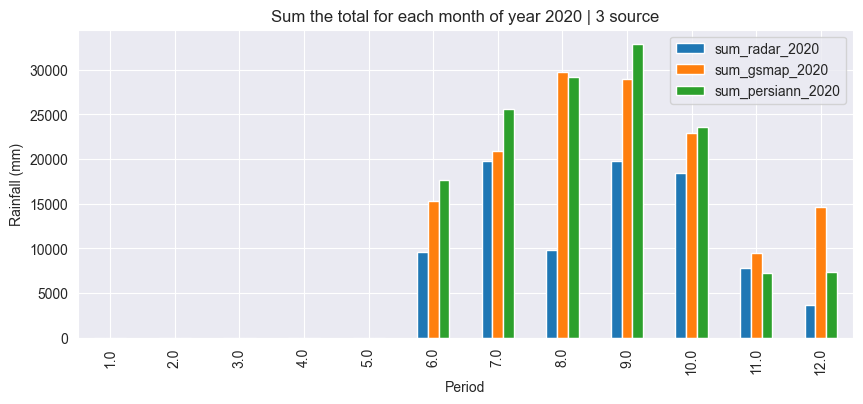

In [28]:
df_plot_sum_2020 = df_summary_period[['sum_radar_2020', 'sum_gsmap_2020', 'sum_persiann_2020']]
df_plot_sum_2020.plot.bar(figsize=(10, 4))
plt.xlabel('Period')
plt.ylabel('Rainfall (mm)')
plt.title('Sum the total for each month of year 2020 | 3 source')
plt.plot()

[]

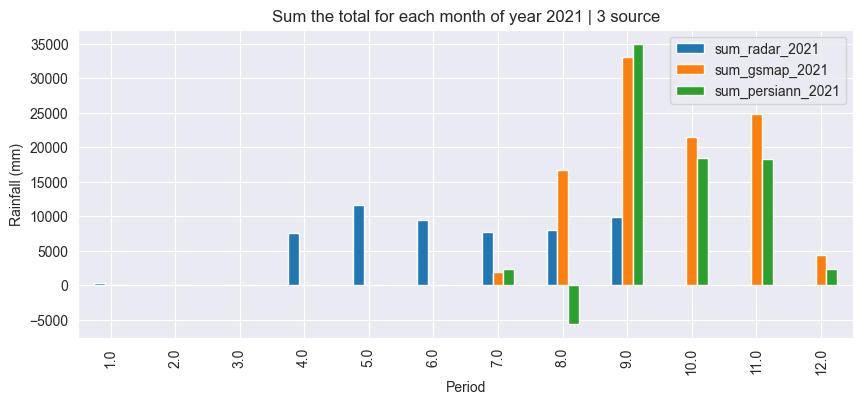

In [29]:
df_plot_sum_2020 = df_summary_period[['sum_radar_2021', 'sum_gsmap_2021', 'sum_persiann_2021']]
df_plot_sum_2020.plot.bar(figsize=(10, 4))
plt.xlabel('Period')
plt.ylabel('Rainfall (mm)')
plt.title('Sum the total for each month of year 2021 | 3 source')
plt.plot()

[]

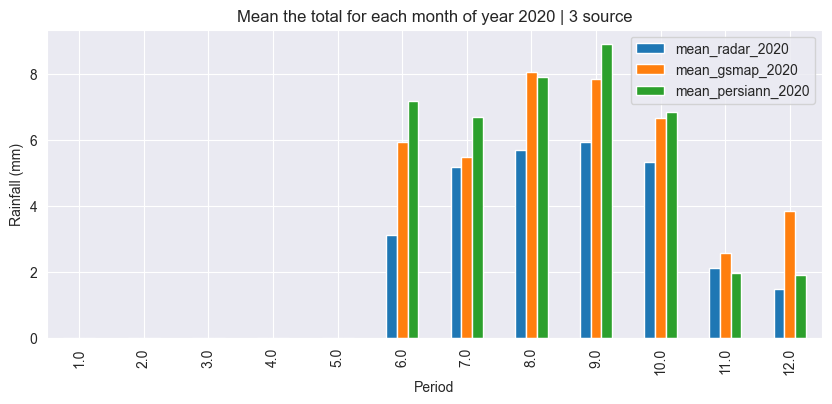

In [30]:
df_plot_sum_2020 = df_summary_period[['mean_radar_2020', 'mean_gsmap_2020', 'mean_persiann_2020']]
df_plot_sum_2020.plot.bar(figsize=(10, 4))
plt.xlabel('Period')
plt.ylabel('Rainfall (mm)')
plt.title('Mean the total for each month of year 2020 | 3 source')
plt.plot()

[]

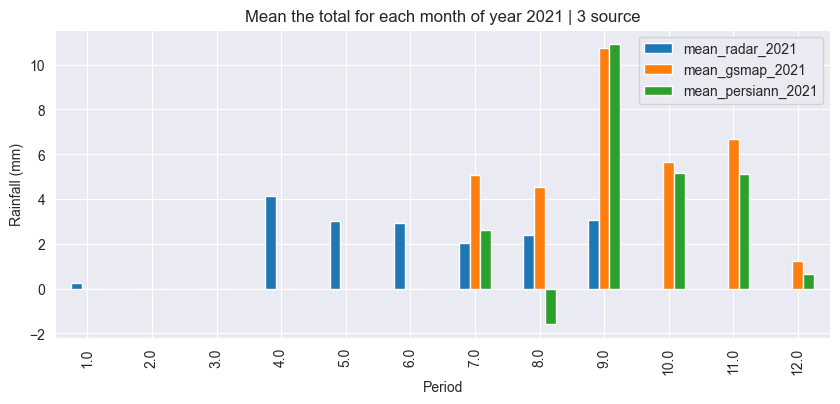

In [31]:
df_plot_sum_2020 = df_summary_period[['mean_radar_2021', 'mean_gsmap_2021', 'mean_persiann_2021']]
df_plot_sum_2020.plot.bar(figsize=(10, 4))
plt.xlabel('Period')
plt.ylabel('Rainfall (mm)')
plt.title('Mean the total for each month of year 2021 | 3 source')
plt.plot()

In [32]:
something_wrong_082021 = filter_dates(df_persiann, start_date='2021-08-01', end_date='2021-09-01')
something_wrong_082021

,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,03Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
25461,121,566,Ko Lanta,Southern WestCoast,7.533334,99.050000,0,0,0,0,...,0,0,0,0,0.00,2021,8,1,2021-08-01 07:00:00+07:00,Sun
25462,123,570,Satun,Southern WestCoast,6.650000,100.083334,0,0,0,0.3400000035762787,...,0,0,0,0,2.71,2021,8,1,2021-08-01 07:00:00+07:00,Sun
25463,120,563,Krabi,Southern WestCoast,8.103611,98.975278,0,0,0,0,...,0,0,0,0,0.71,2021,8,1,2021-08-01 07:00:00+07:00,Sun
25464,32,353,Loei,Northeastern,17.450000,101.733333,0,0,0,0,...,0.019999999552965164,0,0,0,0.02,2021,8,1,2021-08-01 07:00:00+07:00,Sun
25465,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,0,0,...,1.100000023841858,0,0,0,3.07,2021,8,1,2021-08-01 07:00:00+07:00,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29023,37,356,Sakon Nakhon,Northeastern,17.150003,104.133336,0,0,0,0,...,0,0,0,0,0.00,2021,8,31,2021-08-31 07:00:00+07:00,Tue
29024,36,358,Nakhon Phanom (1),Northeastern,17.443056,104.773611,0,0,0,0,...,0,0,0,0,0.00,2021,8,31,2021-08-31 07:00:00+07:00,Tue
29025,35,357,Nakhon Phanom,Northeastern,17.410833,104.782500,0,0,0,0,...,0,0,0,0,0.00,2021,8,31,2021-08-31 07:00:00+07:00,Tue
29026,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,0,0,...,0,0,0,0,0.00,2021,8,31,2021-08-31 07:00:00+07:00,Tue


<AxesSubplot: xlabel='date'>

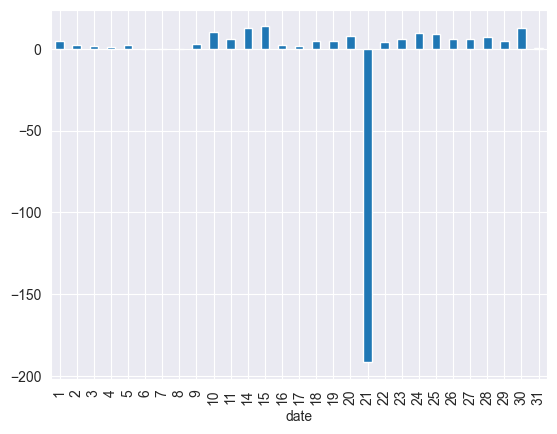

In [33]:
something_wrong_082021 = something_wrong_082021.groupby(something_wrong_082021.date.dt.day)['sum'].mean()
something_wrong_082021.plot.bar()

[]

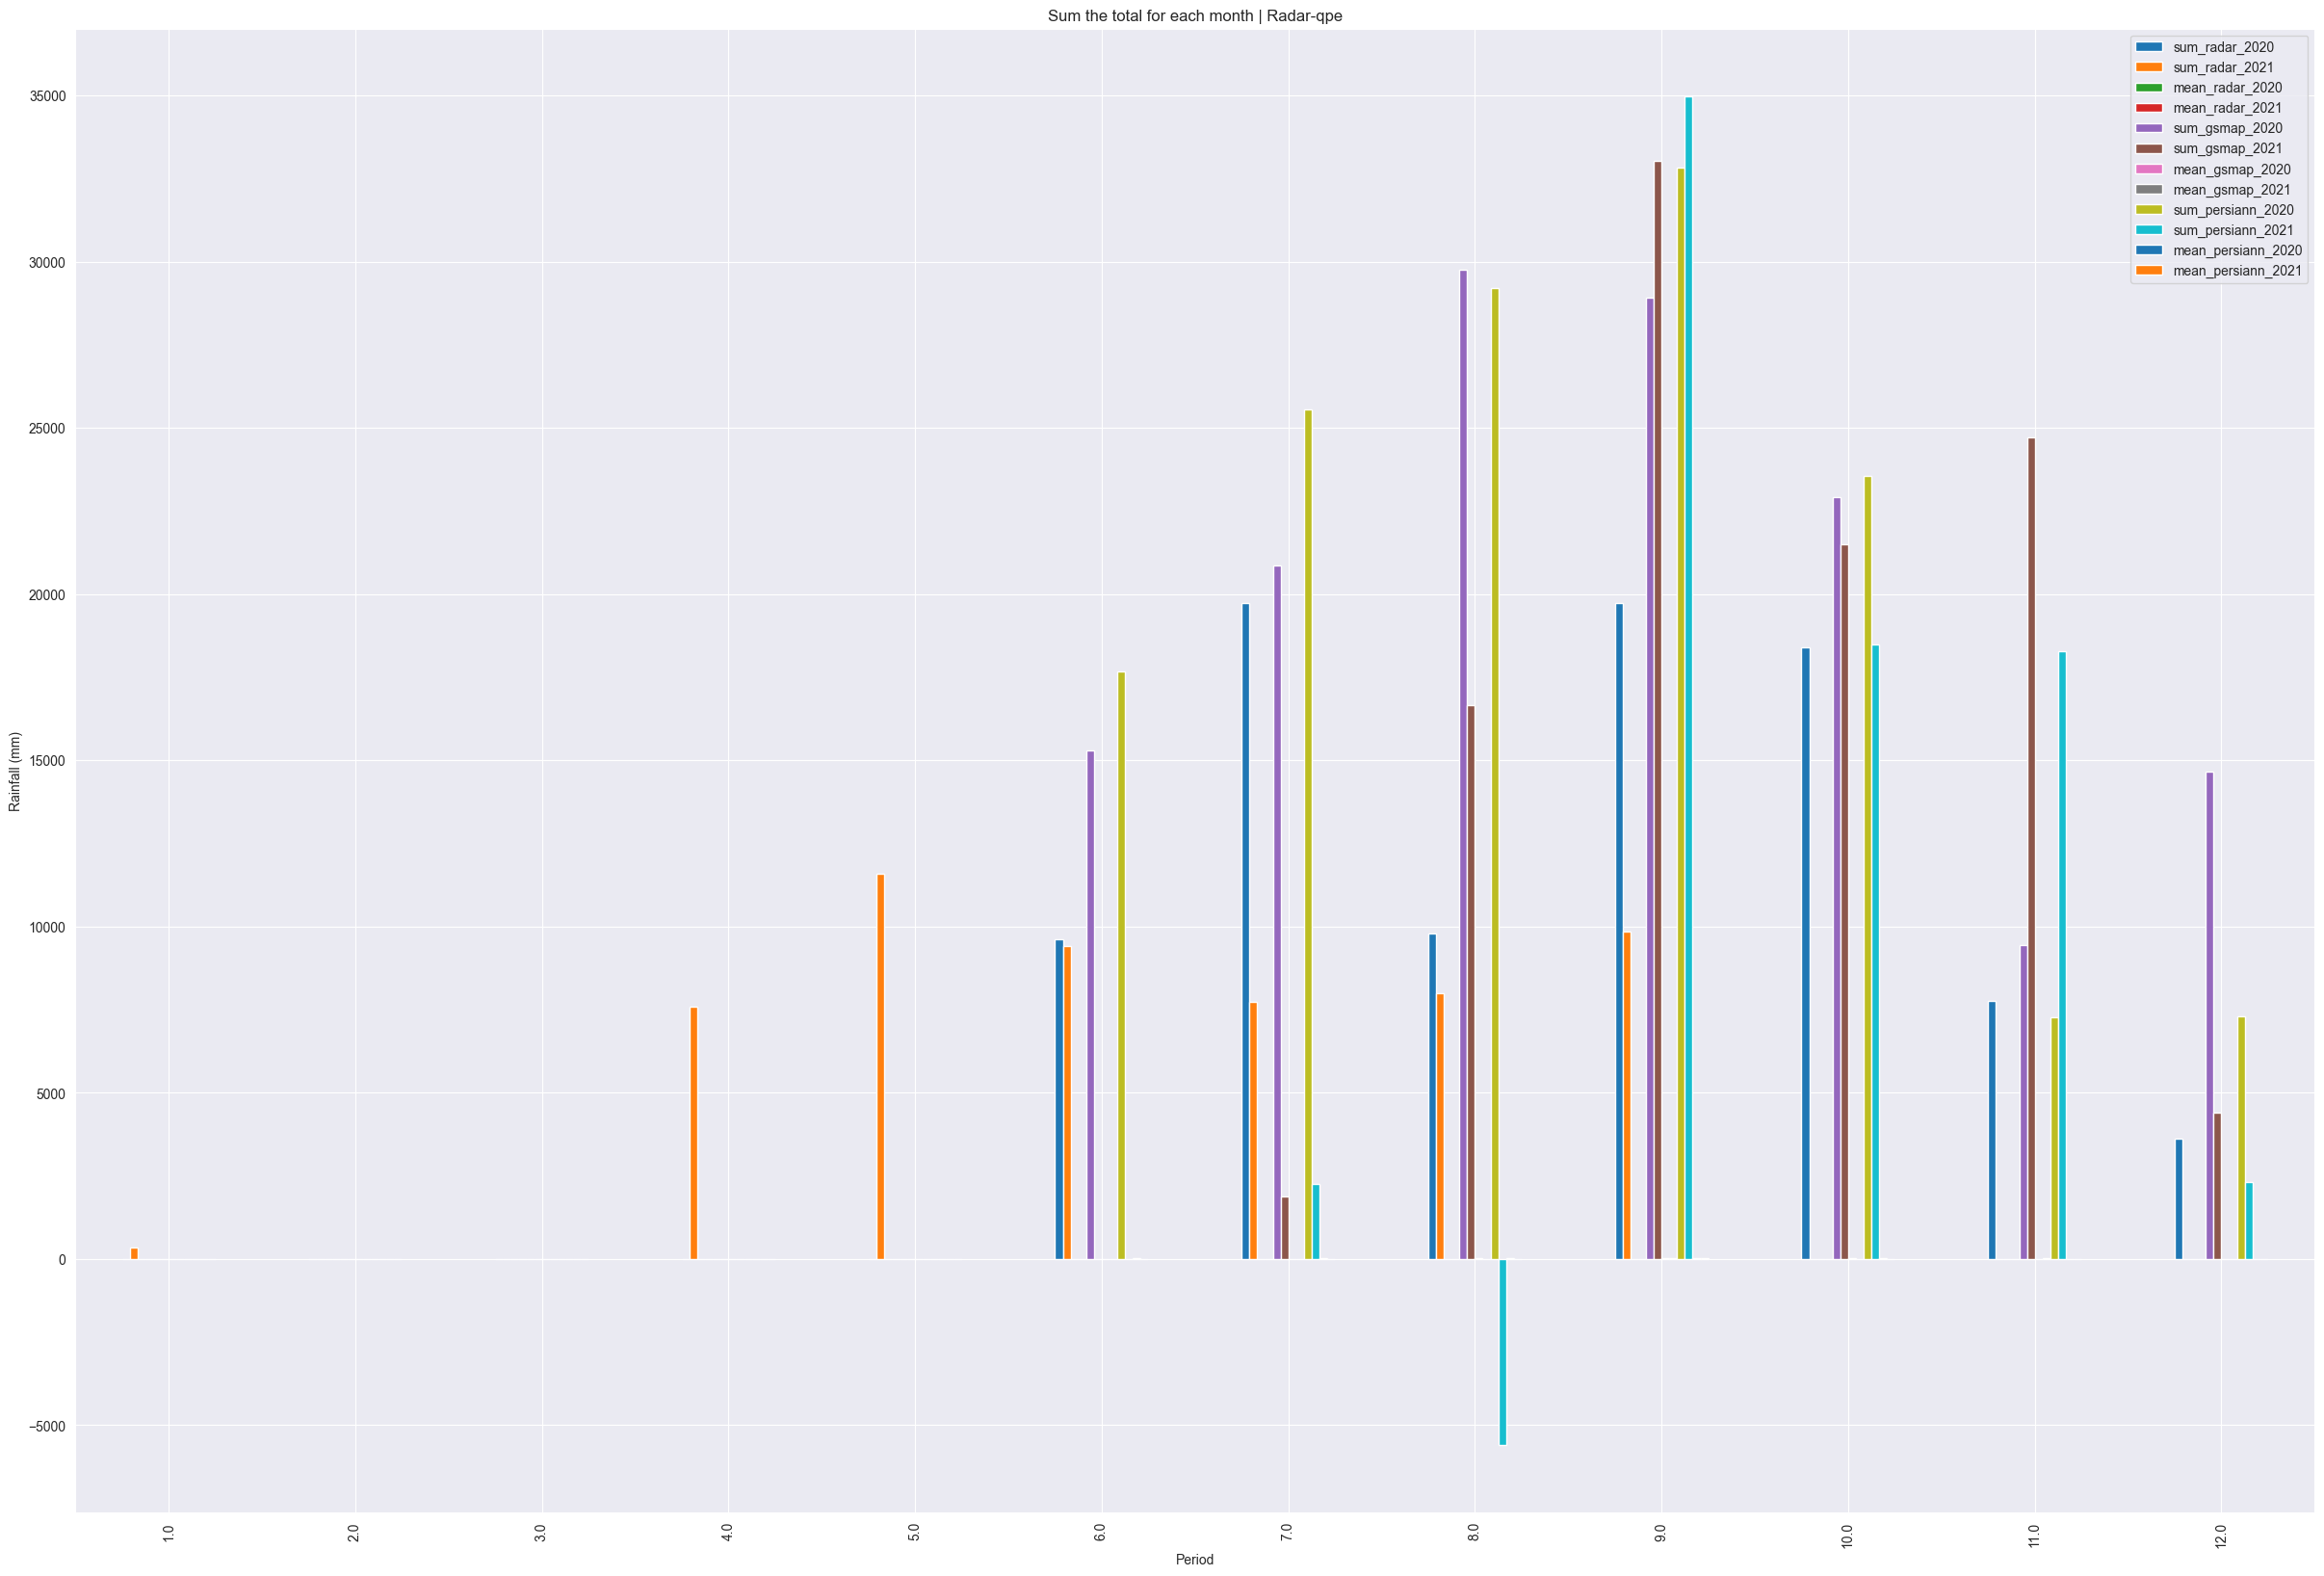

In [34]:
df_summary_period.plot.bar(figsize=(30, 20))
plt.xlabel('Period')
plt.ylabel('Rainfall (mm)')
plt.title('Sum the total for each month | Radar-qpe')
plt.plot()

In [35]:
def plot_most_rainfall(df, start_date: str, end_date: str, color: Optional[str] = None, title: Optional[str] = None,
                       ylabel: Optional[str] = None):
    df = filter_dates(df, start_date=start_date, end_date=end_date)
    df = df.groupby(df.date.dt.day)['sum'].mean()
    fig = plt.figure(figsize=(10, 4))
    ax = plt.gca()
    df.plot(x='date', y='sum', kind='bar', ax=ax, color=color)
    plt.xlabel('Daily')
    plt.ylabel(f'{ylabel} Rainfall')
    plt.title(title)
    plt.plot()

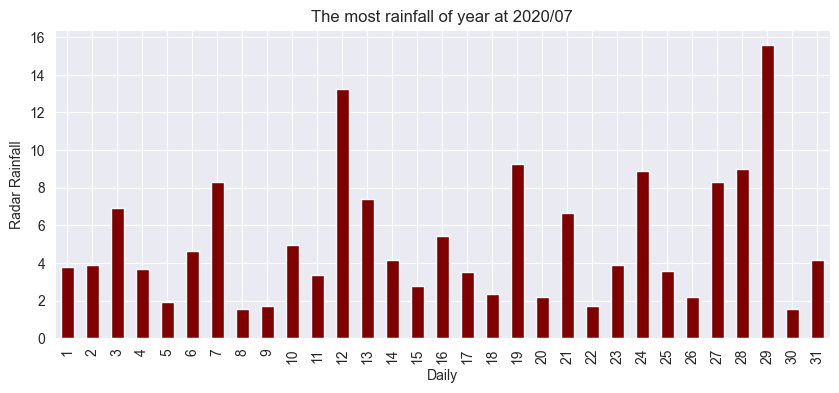

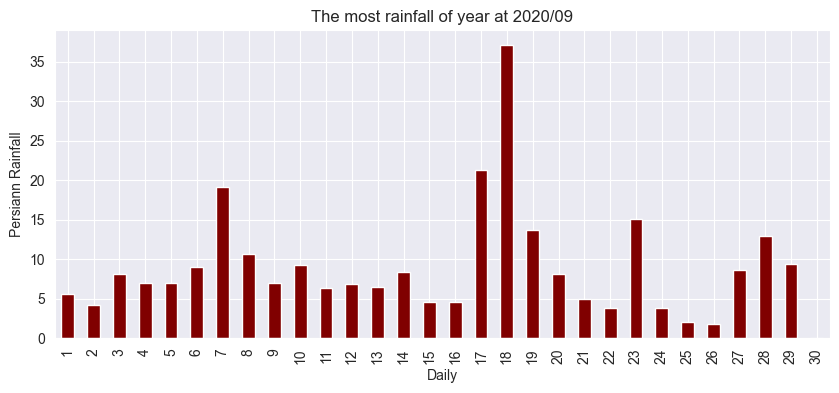

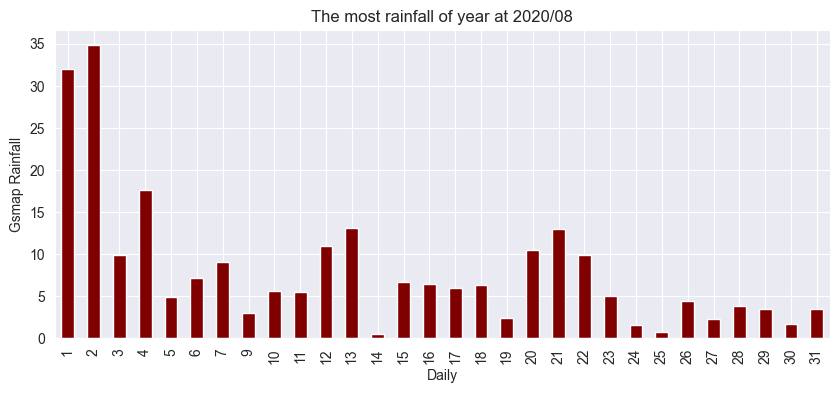

In [36]:
plot_most_rainfall(df_radar, start_date='2020-07-01', end_date='2020-08-01',
                   title='The most rainfall of year at 2020/07', color='maroon', ylabel='Radar')
plot_most_rainfall(df_persiann, start_date='2020-09-01', end_date='2020-10-01',
                   title='The most rainfall of year at 2020/09', ylabel='Persiann', color='maroon')
plot_most_rainfall(df_gsmap, start_date='2020-08-01', end_date='2020-09-01',
                   title='The most rainfall of year at 2020/08', ylabel='Gsmap', color='maroon')

In [37]:
def plot_period_scatter_year(df, title: str, start: Optional[str] = '2020-01-31', end: Optional[str] = '2020-12-31'):
    dft = filter_dates(df, start_date=start, end_date=end)
    dft = dft.replace(0, np.nan, regex=True)
    fig, ax = plt.subplots(figsize=(14, 6.5))
    sns.despine(fig, left=True, bottom=True)
    sns.scatterplot(x="date", y="sum",
                    palette="ch:r=-.2,d=.3_r",
                    sizes=(1, 8), linewidth=0,
                    data=dft, ax=ax, alpha=.5)
    ax.legend(loc='upper left')
    ax.set_title(title)
    ax.set_xlabel('Period')
    ax.set_ylabel('Rainfall (mm)')


/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/817957285.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/817957285.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/817957285.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscor

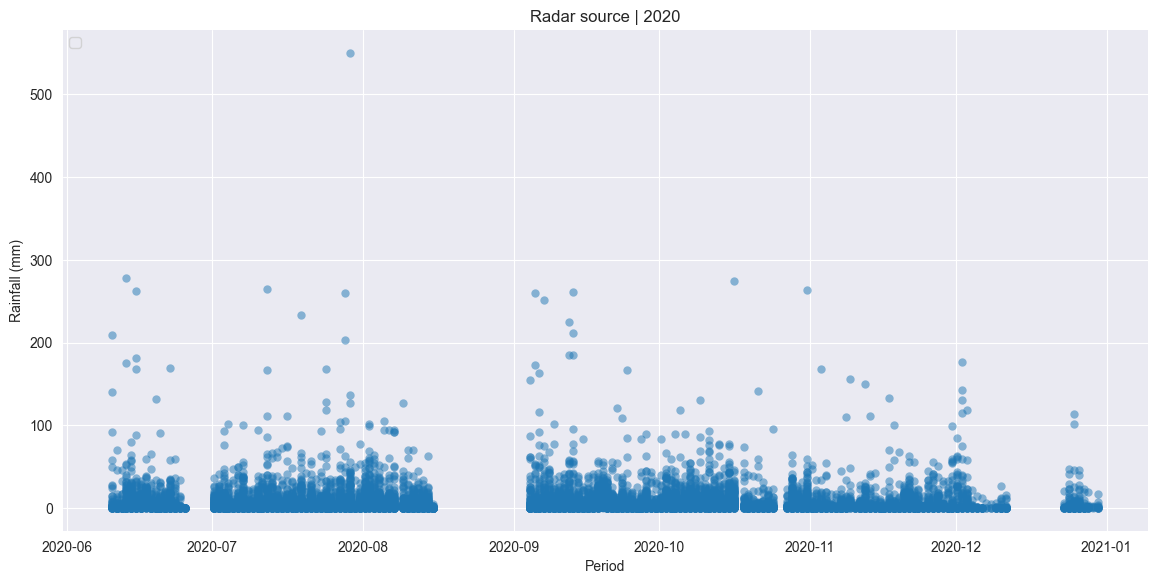

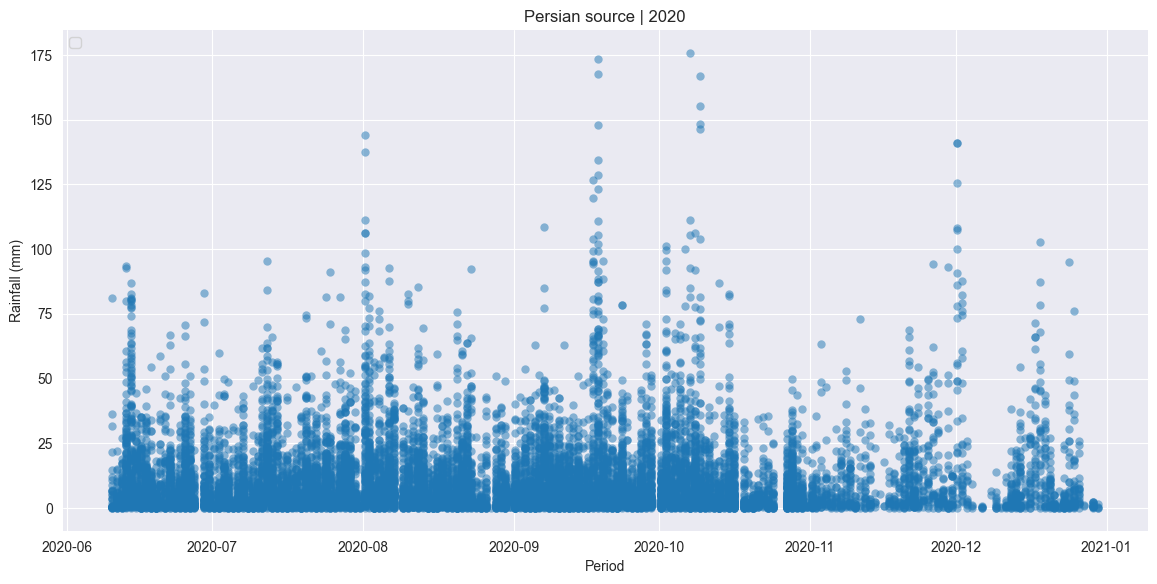

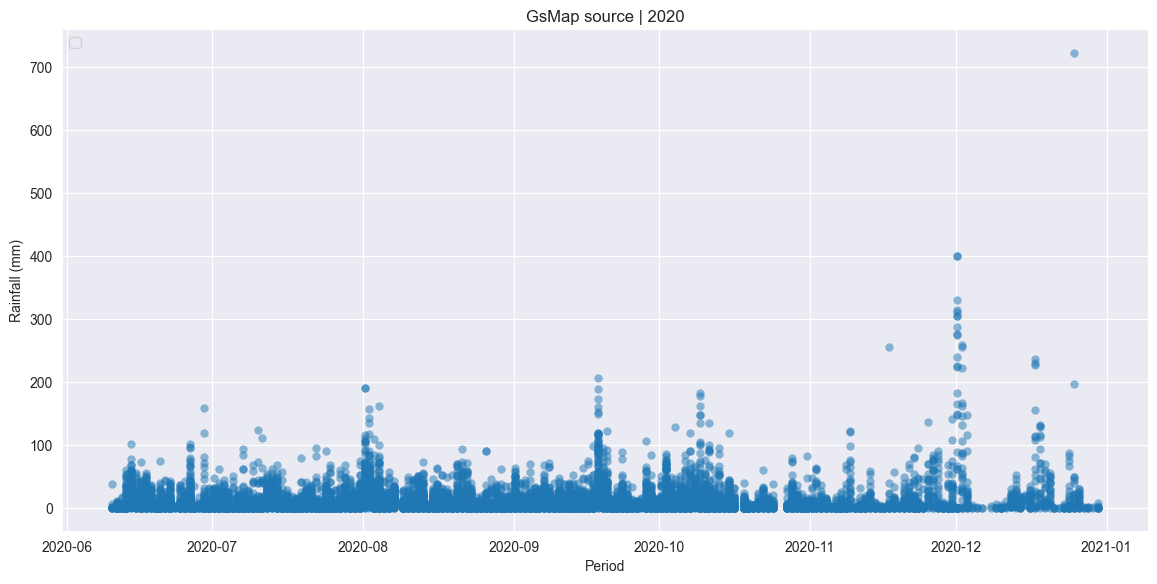

In [38]:
plot_period_scatter_year(df_radar, title='Radar source | 2020')
plot_period_scatter_year(df_persiann, title='Persian source | 2020')
plot_period_scatter_year(df_gsmap, title='GsMap source | 2020')

/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/817957285.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/817957285.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/817957285.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscor

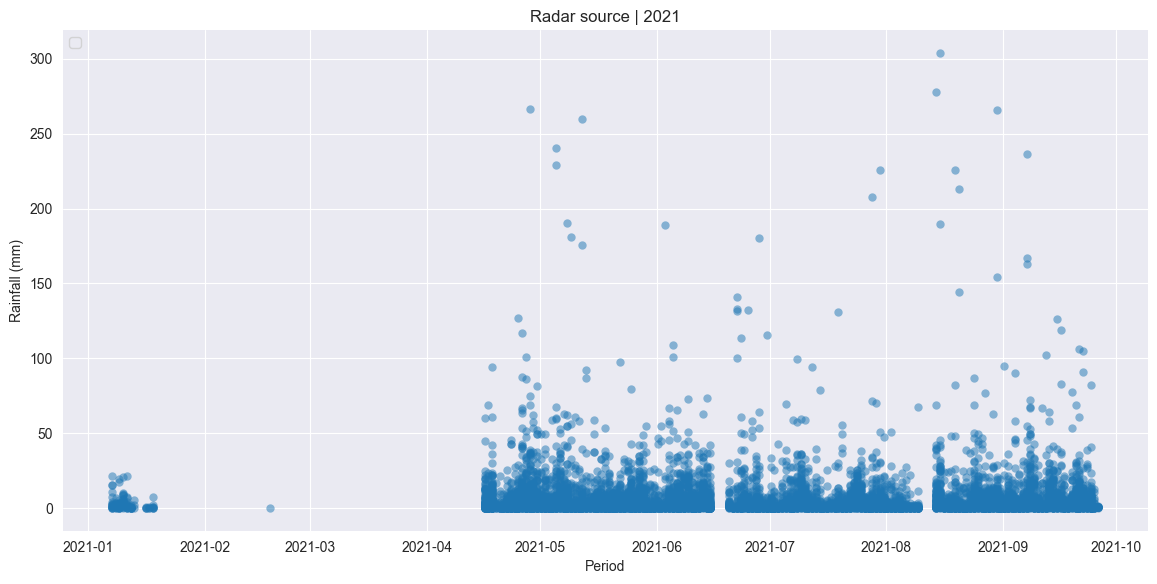

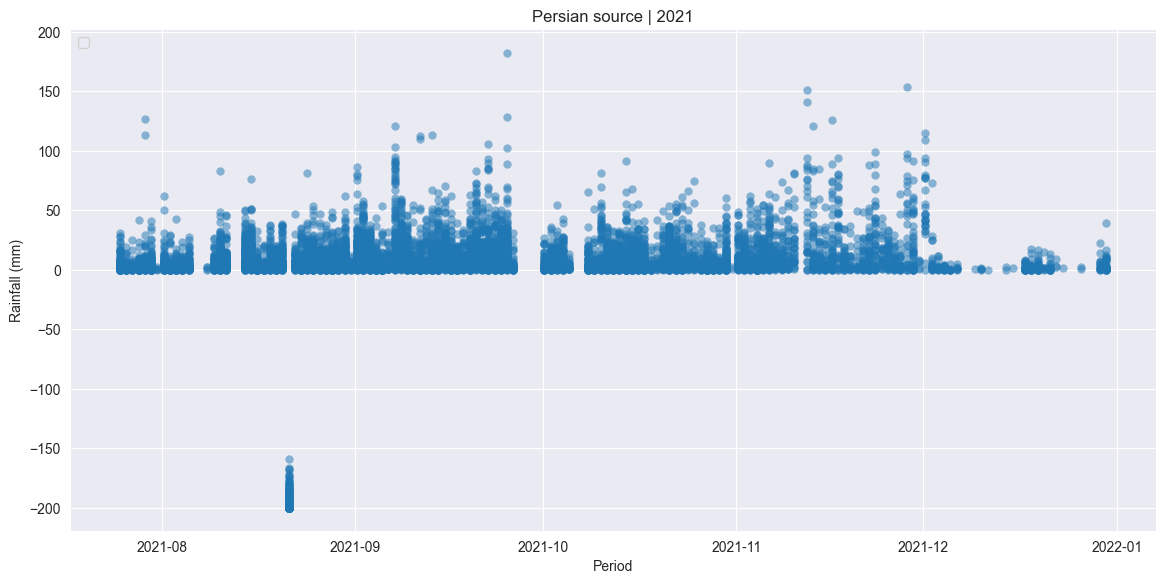

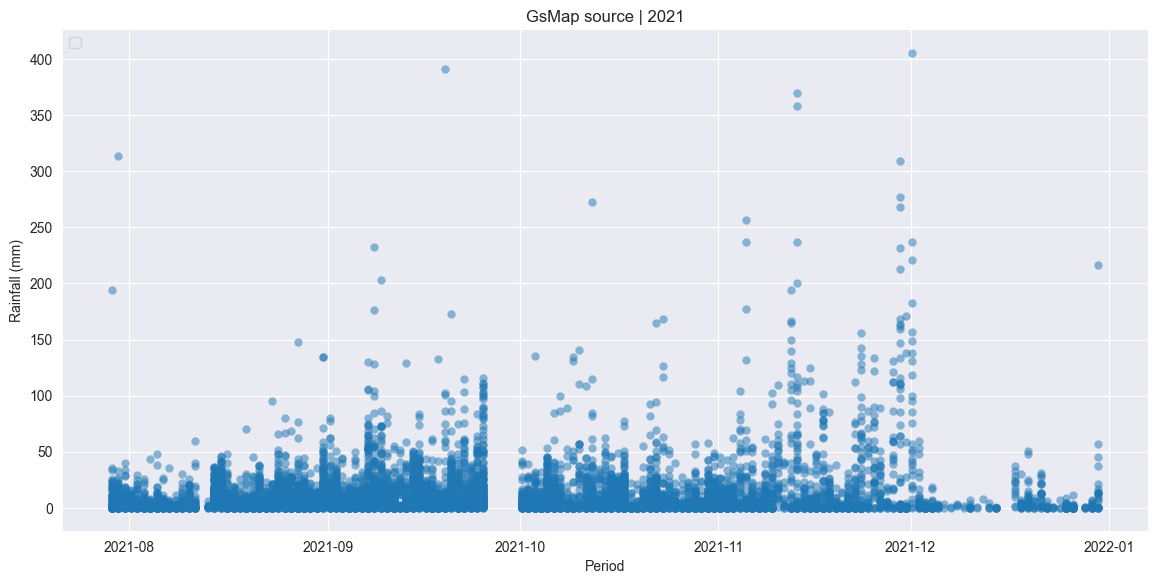

In [39]:
plot_period_scatter_year(df_radar, title='Radar source | 2021', start='2021-01-01', end='2021-12-31')
plot_period_scatter_year(df_persiann, title='Persian source | 2021', start='2021-01-01', end='2021-12-31')
plot_period_scatter_year(df_gsmap, title='GsMap source | 2021', start='2021-01-01', end='2021-12-31')

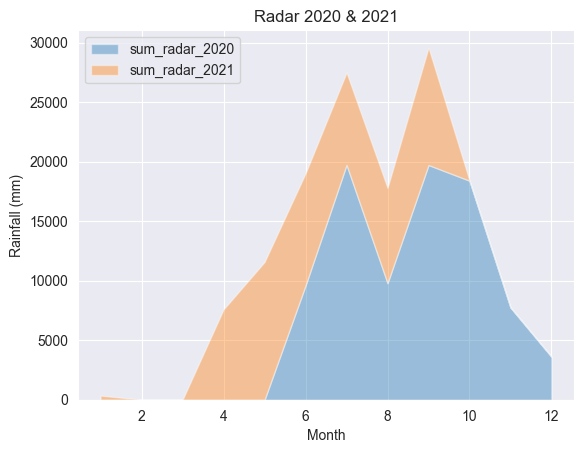

In [40]:
stack_sum_radar_2020 = df_summary_period['sum_radar_2020']
stack_sum_radar_2021 = df_summary_period['sum_radar_2021']
labels = ['sum_radar_2020', 'sum_radar_2021']
y = np.vstack([stack_sum_radar_2020, stack_sum_radar_2021])
x = df_summary_period.index
fig, ax = plt.subplots()
ax.stackplot(x, y, labels=labels, alpha=0.4)
ax.legend(loc='upper left')
ax.set_title('Radar 2020 & 2021')
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall (mm)')
plt.show()

In [41]:
df_summary_period.describe()

,sum_radar_2020,sum_radar_2021,mean_radar_2020,mean_radar_2021,sum_gsmap_2020,sum_gsmap_2021,mean_gsmap_2020,mean_gsmap_2021,sum_persiann_2020,sum_persiann_2021,mean_persiann_2020,mean_persiann_2021
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,7384.574915,4542.309125,2.402977,1.486906,11817.614318,8514.949838,3.361746,2.826246,11950.425843,5893.265881,3.452156,1.912039
std,8111.658588,4801.331866,2.522070,1.587601,11841.814910,12040.205053,3.320884,3.618162,12951.019582,11771.491769,3.689639,3.549957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5590.719535,0.000000,-1.567345
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5681.979932,3965.314960,1.784621,1.131450,12046.455717,939.078142,3.200590,0.615815,7279.545026,0.000000,1.940885,0.000000
75%,11946.024845,8351.232431,5.217791,2.965622,21362.653801,17864.095102,6.104270,5.227462,24061.832535,6307.557529,6.927083,3.244589
max,19736.429656,11570.569887,5.937498,4.112932,29745.399860,33028.153256,8.061084,10.740863,32842.929985,34986.619996,8.900523,10.940156


<AxesSubplot: >

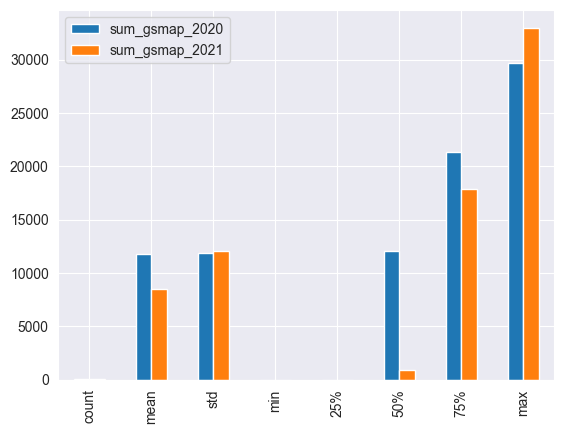

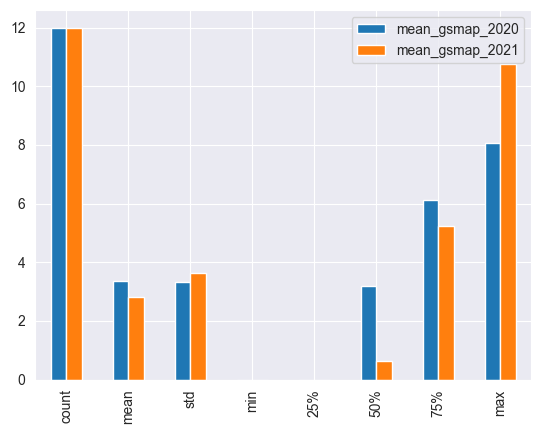

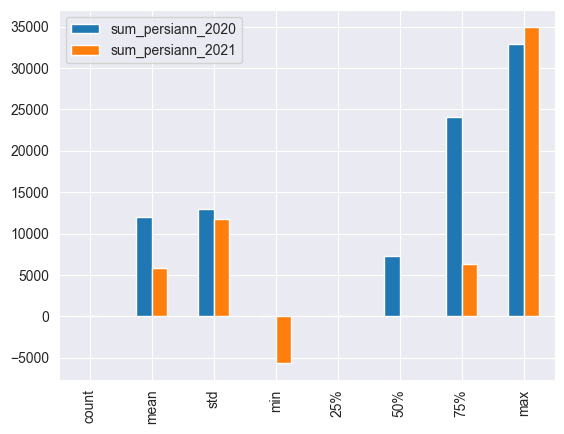

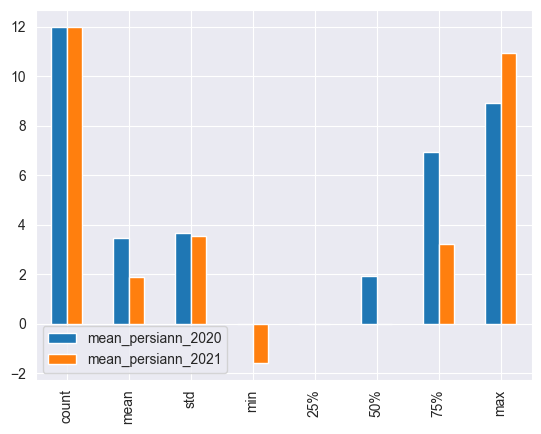

In [42]:
df_summary_period.describe()[['sum_gsmap_2020', 'sum_gsmap_2021']].plot.bar()
df_summary_period.describe()[['mean_gsmap_2020', 'mean_gsmap_2021']].plot.bar()
df_summary_period.describe()[['sum_persiann_2020', 'sum_persiann_2021']].plot.bar()
df_summary_period.describe()[['mean_persiann_2020', 'mean_persiann_2021']].plot.bar()

In [43]:
set(df_radar['NAME_EN'])

{'Aranyaprathet',
 'Ayuthaya (1)',
 'Bang Na (1)',
 'Bangkok Pilot',
 'Bangkok Port',
 'Bhumibol Dam',
 'Bua Chum (2)',
 'Buri Ram',
 'Chachoengsao (1)',
 'Chai Nat',
 'Chaiyaphum',
 'Chanthaburi',
 'Chawang (2)',
 'Chiang Mai',
 'Chiang Rai',
 'Chiang Rai (1)',
 'Chok Chai (2)',
 'Chon Buri',
 'Chumphon',
 'Doi Angkhlang',
 'Doi Muser (1)',
 'Don Muang Airport',
 'Hat Yai',
 'Hua Hin',
 'Huai Pong (1)',
 'Kabin Buri (2)',
 'Kamalasai (2)',
 'Kamphaeng Phet',
 'Kampheang Saen (1)',
 'Kanchanaburi',
 'Khlong Yai',
 'Khon Kaen',
 'Ko Lanta',
 'Ko Samui',
 'Ko Sichang',
 'Korhong (1)',
 'Kosum Phisai (2)',
 'Krabi',
 'Laem Chabang',
 'Lampang',
 'Lampang (1)',
 'Lamphun',
 'Loei',
 'Loei (1)',
 'Lom Sak (2)',
 'Lop Buri',
 'Mae Hong Son',
 'Mae Sariang',
 'Mae Sot',
 'Mukdahan',
 'Nakhon Phanom',
 'Nakhon Phanom (1)',
 'Nakhon Ratchasima',
 'Nakhon Sawan',
 'Nakhon Si Thammarat',
 'Nakhon Si Thammarat (1)',
 'Nan',
 'Nan (1)',
 'Nang Rong (2)',
 'Narathiwat',
 'Nong Bua Lumphu',
 'Nong Kh

In [44]:
def get_station(df, station: str):
    df = df.loc[df['NAME_EN'] == station]
    df = df.replace(0, np.nan, regex=True)
    df = df.replace(0, np.nan, regex=True)
    df = df.sort_values(by='date')
    return df

In [45]:
def comparison_station(df, name1, name2):
    station1 = get_station(df, name1)
    station2 = get_station(df, name2)
    fig, ax = plt.subplots(figsize=(14, 6.5))
    sns.despine(fig, left=True, bottom=True)
    sns.scatterplot(x="date", y="sum",
                    palette="ch:r=-.2,d=.3_r",
                    sizes=(1, 8), linewidth=0,
                    data=station1, ax=ax, alpha=.5, color='maroon')

    sns.scatterplot(x="date", y="sum",
                    palette="ch:r=-.2,d=.3_r",
                    sizes=(1, 8), linewidth=0,
                    data=station2, ax=ax, alpha=.5, color='g')

    ax.legend(loc='upper left')
    ax.set_title('Compare station')
    ax.set_xlabel('Period')
    ax.set_ylabel('Rainfall (mm)')



/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/400365342.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/400365342.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


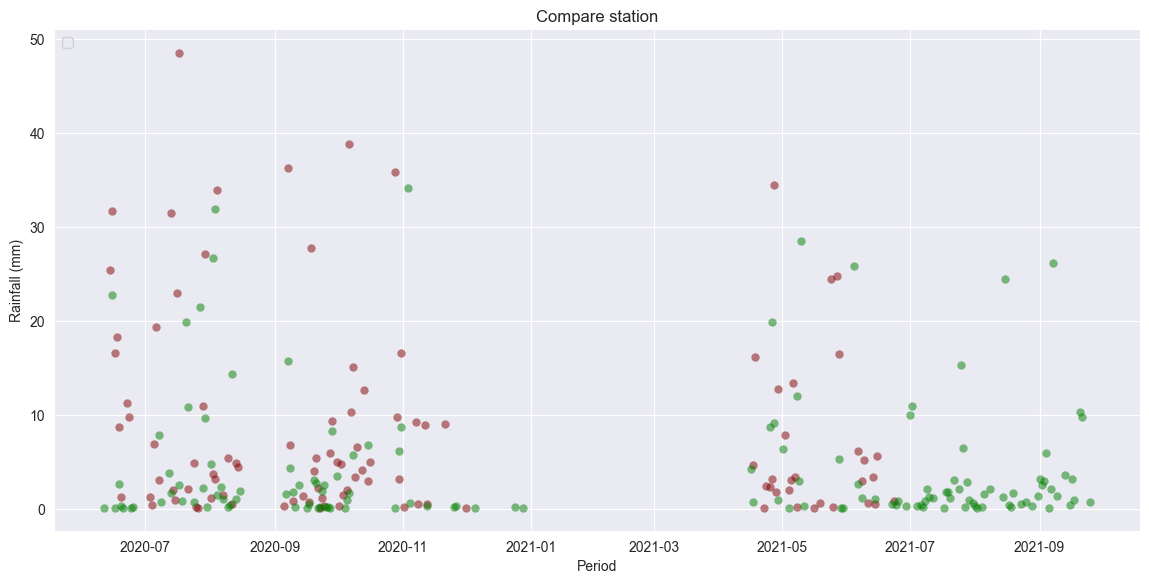

In [46]:
comparison_station(df_radar, 'Ayuthaya (1)', 'Mae Hong Son')

In [47]:
"""
 dlon = lon2 - lon1
 dlat = lat2 - lat1
 a = (sin(dlat/2))^2 + cos(lat1) * cos(lat2) * (sin(dlon/2))^2
 c = 2 * atan2( sqrt(a), sqrt(1-a) )
 d = R * c (where R is the radius of the Earth)
"""

'\n dlon = lon2 - lon1\n dlat = lat2 - lat1\n a = (sin(dlat/2))^2 + cos(lat1) * cos(lat2) * (sin(dlon/2))^2\n c = 2 * atan2( sqrt(a), sqrt(1-a) )\n d = R * c (where R is the radius of the Earth)\n'

/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/4227209045.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",
/var/folders/3n/4z6m79x53dl0400tlmqgv0bm0000gn/T/ipykernel_56990/4227209045.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="date", y="sum",


Text(0, 0.5, 'Rainfall (mm)')

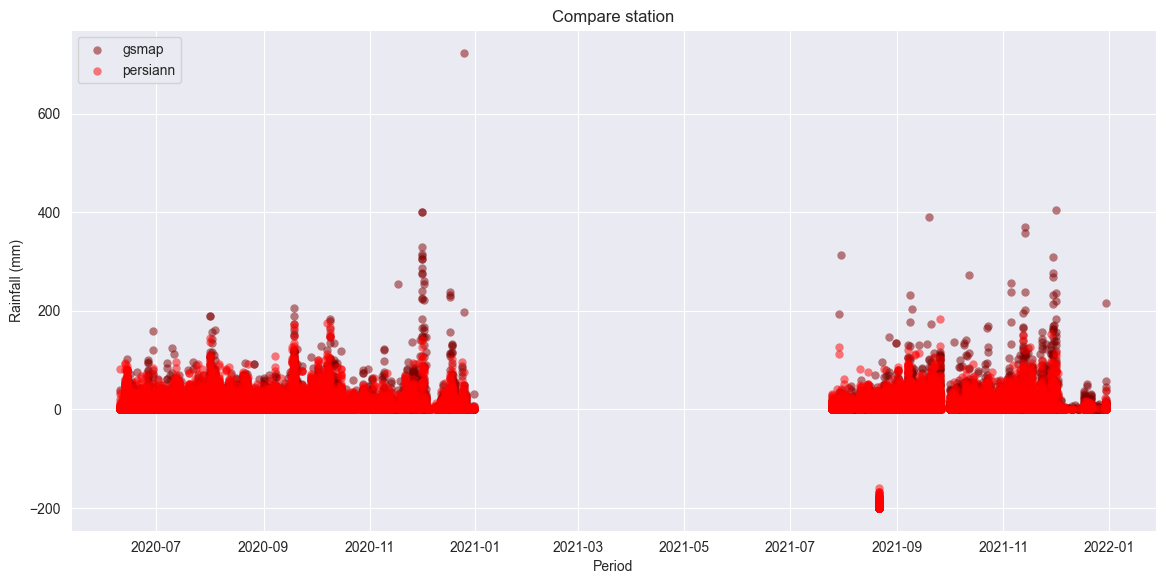

In [51]:
starting = '2020-01-01'
ending = '2021-12-31'
gsmap_stations = filter_dates(df_gsmap, start_date=starting, end_date=ending)
gsmap_stations = gsmap_stations.replace(0, np.nan, regex=True)

persiann_stations = filter_dates(df_persiann, start_date=starting, end_date=ending)
persiann_stations = persiann_stations.replace(0, np.nan, regex=True)

fig, ax = plt.subplots(figsize=(14, 6.5))
sns.scatterplot(x="date", y="sum",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                label='gsmap',
                data=gsmap_stations,
                ax=ax,
                alpha=.5,
                color='maroon')

sns.scatterplot(x="date", y="sum",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                label='persiann',
                data=persiann_stations,
                ax=ax,
                alpha=.5,
                color='red')

ax.legend(loc='upper left')
ax.set_title('Compare station')
ax.set_xlabel('Period')
ax.set_ylabel('Rainfall (mm)')
